# Project Title - Smart HR: Data Driven Promotion Recommendation System

In a large organization,identifying the deserving candidates for the promotion is a tough job, hence by using historical employee data we emphasis on exploring an option to make a data driven system to asist HR in making fair and informed decision

We hope to achieve-
1.Exploring and analysing the key factors influencing employee promotions
2.Build a binary classification model to predict liklihood of the promotion
3.Tuning the hyperparameters to improve model performance

The project consists of the dataset consisting of 50000+ employee data with the detailed information on there employee id,department,region,education,gender,recruitment channel,no of trainings,age,previous year rating,length of service,if there KPIs_met >80%,awards won or not ,avg training score and finally if the employee is promoted


The project involves usage of libraries -Pandas(to retrieve and perform some basic pre-processing),Scikit-learn(to split,fit or train the model),Matplotib,Seaborn(for some basic visualisation)

In short this project assists HR teams identify employees likely to be promoted, using machine learning models trained on historical performance data.
Enables data-driven decision-making by automating promotion eligibility screening with high accuracy.
Improves fairness, reduces manual bias, and enhances organizational talent management processes.

### Importing the useful libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import warnings
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings("ignore")

### Loading the dataset

In [ ]:
data=pd.read_csv(r"/content/employee_promotion_dataset.csv")

In [ ]:
data.count()

,0
employee_id,54808
department,54808
region,54808
education,52399
gender,54808
recruitment_channel,54808
no_of_trainings,54808
age,54808
previous_year_rating,50684
length_of_service,54808


In [ ]:
data.shape

(54808, 14)

Since Employee Id is not significant to see if the promotion should be given or not we can eliminate it

In [ ]:
data.drop(["employee_id"],axis=1,inplace=True)

In [ ]:
data

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             52399 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  50684 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   KPIs_met >80%         54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


Converting the object datatype to integer datatype to make the correlation easier

### Preprocesing and Visualizing

Finding all the categorical data into one

In [ ]:
categorical_cols=data.select_dtypes(include=['object']).columns.tolist()

Similarly for all the numerical data into one

In [ ]:
numeric_cols=data.select_dtypes(include=['int64','float64']).columns.tolist()

For handling all the missing values in numeric data using SimpleImputer using mean as its strategy

In [ ]:
si=SimpleImputer(strategy="mean")

In [ ]:
data[numeric_cols]=si.fit_transform(data[numeric_cols])

Handling the label encoder to encode the categorical columns

In [ ]:
le=LabelEncoder()
for col in categorical_cols:
    data[col]=le.fit_transform(data[col])

In [ ]:
data

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,7,31,2,0,2,1.0,35.0,5.0,8.0,1.0,0.0,49.0,0.0
1,4,14,0,1,0,1.0,30.0,5.0,4.0,0.0,0.0,60.0,0.0
2,7,10,0,1,2,1.0,34.0,3.0,7.0,0.0,0.0,50.0,0.0
3,7,15,0,1,0,2.0,39.0,1.0,10.0,0.0,0.0,50.0,0.0
4,8,18,0,1,0,1.0,45.0,3.0,2.0,0.0,0.0,73.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,8,5,0,1,2,1.0,48.0,3.0,17.0,0.0,0.0,78.0,0.0
54804,4,19,2,0,0,1.0,37.0,2.0,6.0,0.0,0.0,56.0,0.0
54805,0,0,0,1,0,1.0,27.0,5.0,3.0,1.0,0.0,79.0,0.0
54806,7,33,3,1,2,1.0,29.0,1.0,2.0,0.0,0.0,45.0,0.0


Checking the correlation of the data and visualising it as per line graph and heatmap to understand the relation of promotion better

In [ ]:
data.corr()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
department,1.000000,-0.020592,0.068075,-0.030108,0.004732,0.014152,0.079162,-0.137224,0.059060,-0.088209,-0.002151,-0.251626,0.000130
region,-0.020592,1.000000,-0.006510,0.019730,-0.000920,-0.004590,-0.088918,-0.004824,-0.058939,-0.007664,0.000307,0.023572,0.008841
education,0.068075,-0.006510,1.000000,0.010125,-0.005973,-0.044336,0.233830,-0.002185,0.161002,-0.018008,-0.001175,-0.022174,0.009608
gender,-0.030108,0.019730,0.010125,1.000000,0.006567,0.084501,-0.016293,-0.023333,-0.019675,-0.037400,0.002381,-0.024494,-0.011109
recruitment_channel,0.004732,-0.000920,-0.005973,0.006567,1.000000,-0.010405,-0.011400,0.005901,-0.002887,-0.000297,-0.005510,-0.002416,0.002229
no_of_trainings,0.014152,-0.004590,-0.044336,0.084501,-0.010405,1.000000,-0.081278,-0.059804,-0.057275,-0.045576,-0.007628,0.042517,-0.024896
age,0.079162,-0.088918,0.233830,-0.016293,-0.011400,-0.081278,1.000000,0.005710,0.657111,-0.025592,-0.008169,-0.048380,-0.017166
previous_year_rating,-0.137224,-0.004824,-0.002185,-0.023333,0.005901,-0.059804,0.005710,1.000000,0.000239,0.338134,0.026669,0.072065,0.153406
length_of_service,0.059060,-0.058939,0.161002,-0.019675,-0.002887,-0.057275,0.657111,0.000239,1.000000,-0.077693,-0.039927,-0.038122,-0.010670
KPIs_met >80%,-0.088209,-0.007664,-0.018008,-0.037400,-0.000297,-0.045576,-0.025592,0.338134,-0.077693,1.000000,0.097000,0.078391,0.221582


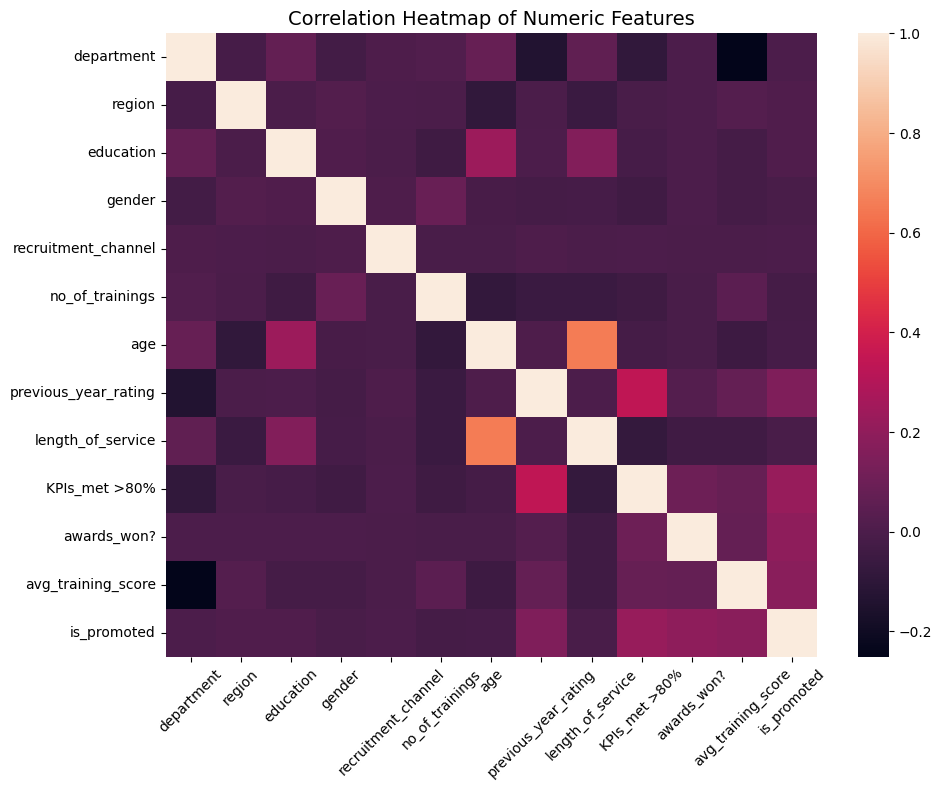

In [ ]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix)
plt.title('Correlation Heatmap of Numeric Features', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

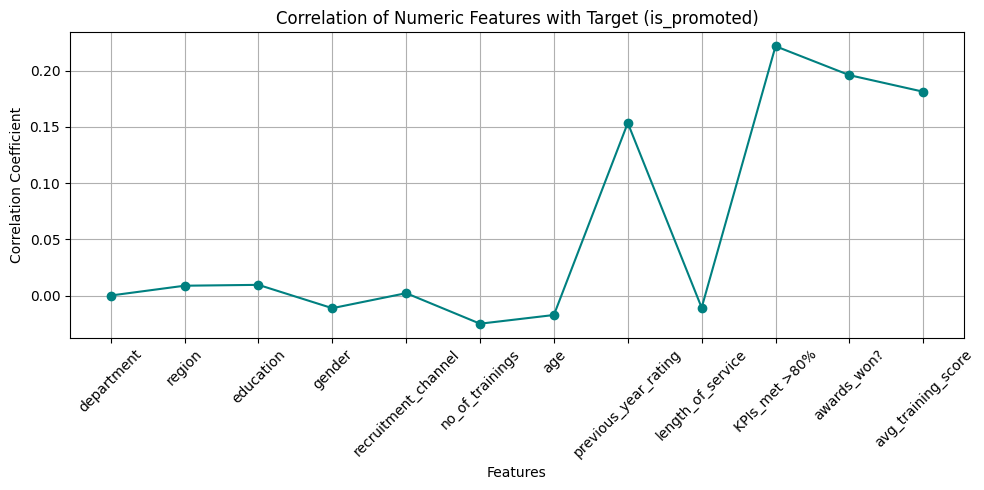

In [ ]:
correlations = data.corr()['is_promoted'].drop('is_promoted')
plt.figure(figsize=(10, 5))
plt.plot(correlations.index, correlations.values, marker='o', linestyle='-', color='teal')
plt.title('Correlation of Numeric Features with Target (is_promoted)')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Splitting and Traning the data

In [ ]:
X=data.drop('is_promoted',axis=1)
y=data['is_promoted']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Implementing the model

In [ ]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

GridSearch for the model

In [ ]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
best_model = grid.best_estimator_

In [ ]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the best Decision Tree model:", accuracy)

Accuracy of the best Decision Tree model: 0.9379675241744208


Similarly for Random Forest

In [ ]:
model1 = RandomForestClassifier(random_state=42)
model1.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
param_grid1 = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'n_estimators': [100, 200]  # Optional: you can also tune number of trees
}
grid1 = GridSearchCV(estimator=model1, param_grid=param_grid,
                    cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid1.fit(X_train, y_train)
best_rf_model = grid1.best_estimator_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [ ]:
y_pred1= best_rf_model.predict(X_test)
accuracy=accuracy_score(y_test, y_pred)
print("Accuracy of the best Decision Tree model:", accuracy)

Accuracy of the best Decision Tree model: 0.9379675241744208
